In [1]:
import pandas as pd
import numpy as np
import requests

# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
import os
import json
from scipy import stats
from matplotlib import cm

# Import API key
from config import g_key

# Import API key
from config import weather_api_key

In [2]:
# Create reference to CSV file
csv_path = "happiness_weather_top10.csv"
# Import the CSV into a pandas DataFrame
cities_weather_df = pd.read_csv(csv_path, low_memory=False)
# Delete extra index column
del cities_weather_df['Unnamed: 0']
# Show dataframe
cities_weather_df

# cities_weather_df.drop(index=None, columns="Unnamed", inplace=True)

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,ContinentName,City,CapitalLatitude,CapitalLongitude,Temp,Cloudiness,Wind Speed,Humidity
0,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,Europe,Copenhagen,55.666667,12.583333,36.73,40.0,8.05,93.0
1,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,Europe,Oslo,59.916667,10.750000,31.98,93.0,1.01,81.0
2,Finland,7.406,7.413,7.469,7.632,7.769,7.5378,Europe,Helsinki,60.166667,24.933333,20.62,20.0,5.75,86.0
3,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,Europe,Bern,46.916667,7.466667,46.11,0.0,2.30,76.0
4,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,Europe,Reykjavik,64.150000,-21.950000,34.95,0.0,5.75,65.0
5,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4046,Europe,Amsterdam,52.350000,4.916667,47.44,0.0,12.66,81.0
6,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,Central America,Ottawa,45.416667,-75.700000,22.17,90.0,12.66,68.0
7,Sweden,7.364,7.291,7.284,7.314,7.343,7.3192,Europe,Stockholm,59.333333,18.050000,34.93,90.0,5.75,93.0
8,New Zealand,7.286,7.334,7.314,7.324,7.307,7.3130,Australia,Wellington,-41.300000,174.783333,57.70,40.0,12.66,88.0
9,Australia,7.284,7.313,7.284,7.272,7.228,7.2762,Australia,Canberra,-35.266667,149.133333,60.24,18.0,5.75,94.0


In [3]:

# Configure gmaps
gmaps.configure(api_key=g_key)

In [4]:
# Store latitude and longitude in locations
locations = cities_weather_df[["CapitalLatitude", "CapitalLongitude"]]
cloudiness = cities_weather_df["Cloudiness"]
# Plot Heatmap
fig = gmaps.figure()
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

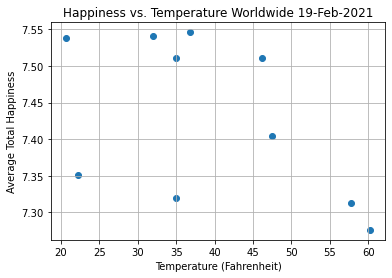

In [12]:
plt.scatter(cities_weather_df["Temp"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Temperature Worldwide 19-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Temperature (Fahrenheit)")
plt.grid(True)
plt.savefig("../Images/HapVStempWorld.png")

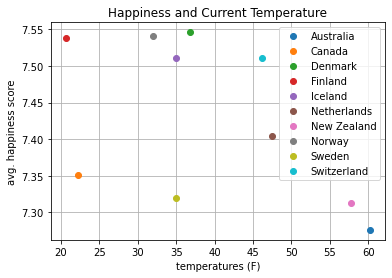

In [35]:
labels = cities_weather_df["Country"].tolist()
temps = cities_weather_df["Temp"].tolist()
avg_happiness = cities_weather_df["Avg Happiness"].tolist()

data = pd.DataFrame({"X Value": temps,"Y Value": avg_happiness, "Country": labels})
groups = data.groupby("Country")
for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()
plt.title('Happiness and Current Temperature')
plt.xlabel('temperatures (F)')
plt.ylabel('avg. happiness score')
plt.grid(True)
plt.savefig("../Images/HapVStempWorld.png")

# Source: https://www.kite.com/python/answers/how-to-color-a-scatter-plot-by-category-using-matplotlib-in-python

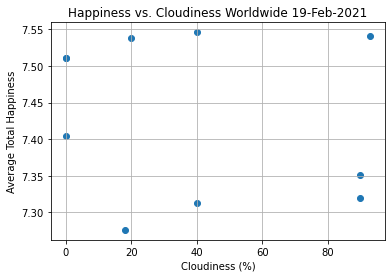

In [13]:
plt.scatter(cities_weather_df["Cloudiness"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Cloudiness Worldwide 19-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../Images/CloudVStempWorld.png")

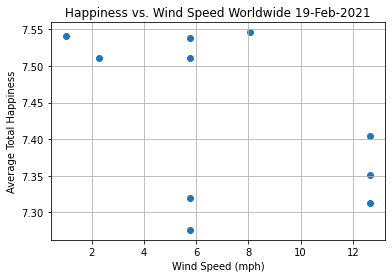

In [14]:
plt.scatter(cities_weather_df["Wind Speed"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Wind Speed Worldwide 19-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../Images/WindVStempWorld.png")

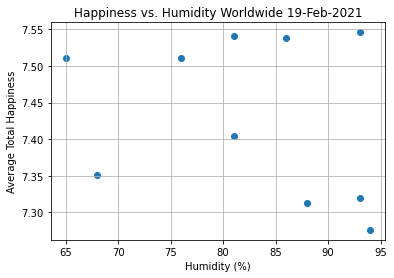

In [15]:
plt.scatter(cities_weather_df["Humidity"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Humidity Worldwide 19-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.savefig("../Images/HumidVStempWorld.png")

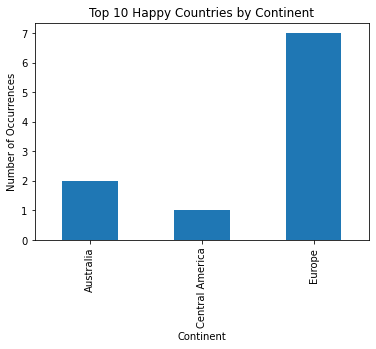

<Figure size 432x288 with 0 Axes>

In [16]:
# Split up our data into groups based upon 'continent'
region_groups = cities_weather_df.groupby('ContinentName')

# Find out how many of each country is in each continent
region_happies = region_groups['Temp'].count()

# Chart our data, give it a title, and label the axes
region_chart = region_happies.plot(kind="bar", title="Top 10 Happy Countries by Continent")
region_chart.set_xlabel("Continent")
region_chart.set_ylabel("Number of Occurrences")

plt.show()
plt.tight_layout()
plt.savefig("../Images/Happy10continents.png")

In [17]:
# Create reference to CSV file
csv_path = "happiness_weather.csv"
# Import the CSV into a pandas DataFrame
cities_weather_complete = pd.read_csv(csv_path, low_memory=False)
# Delete extra index column
# del cities_weather_df['Unnamed: 0']
# Show dataframe
cities_weather_complete



,Unnamed: 0,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,ContinentName,City,CapitalLatitude,CapitalLongitude,Temp,Cloudiness,Wind Speed,Humidity
0,0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,Europe,Bern,46.916667,7.466667,46.11,0.0,2.30,76.0
1,1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,Europe,Reykjavik,64.150000,-21.950000,34.95,0.0,5.75,65.0
2,2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,Europe,Copenhagen,55.666667,12.583333,36.73,40.0,8.05,93.0
3,3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,Europe,Oslo,59.916667,10.750000,31.98,93.0,1.01,81.0
4,4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,Central America,Ottawa,45.416667,-75.700000,22.17,90.0,12.66,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Rwanda,3.465,3.515,3.471,3.408,3.334,3.4386,Africa,Kigali,-1.950000,30.050000,75.20,75.0,2.30,60.0
137,137,Benin,3.340,3.484,3.657,4.141,4.883,3.9010,Africa,Porto-Novo,6.483333,2.616667,86.00,98.0,6.91,51.0
138,138,Syria,3.006,3.069,3.462,3.462,3.462,3.2922,Asia,Damascus,33.500000,36.300000,42.80,75.0,11.50,87.0
139,139,Burundi,2.905,2.905,2.905,2.905,3.775,3.0790,Africa,Bujumbura,-3.366667,29.350000,77.00,75.0,2.42,78.0


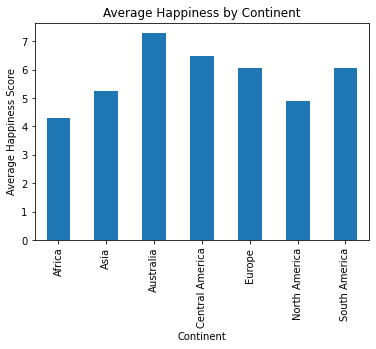

<Figure size 432x288 with 0 Axes>

In [18]:
# Split up our data into groups based upon 'continent'
continent_groups = cities_weather_complete.groupby('ContinentName')
continent_groups
# Find out how many of each country is in each continent
continent_happies = continent_groups['Avg Happiness'].mean()

# Chart our data, give it a title, and label the axes
continent_chart = continent_happies.plot(kind="bar", title="Average Happiness by Continent")
continent_chart.set_xlabel("Continent")
continent_chart.set_ylabel("Average Happiness Score")

plt.show()
plt.tight_layout()
plt.savefig("../Images/HappyAllContinents.png")